In [1]:
print('hello world')

hello world


In [15]:
for n in range(1,11):
    print('квадрат числа',n,'равен',n*n)

квадрат числа 1 равен 1
квадрат числа 2 равен 4
квадрат числа 3 равен 9
квадрат числа 4 равен 16
квадрат числа 5 равен 25
квадрат числа 6 равен 36
квадрат числа 7 равен 49
квадрат числа 8 равен 64
квадрат числа 9 равен 81
квадрат числа 10 равен 100


In [47]:
for n in range(1,11):
    print('квадрат числа',n,'равен',n**27)

квадрат числа 1 равен 1
квадрат числа 2 равен 134217728
квадрат числа 3 равен 7625597484987
квадрат числа 4 равен 18014398509481984
квадрат числа 5 равен 7450580596923828125
квадрат числа 6 равен 1023490369077469249536
квадрат числа 7 равен 65712362363534280139543
квадрат числа 8 равен 2417851639229258349412352
квадрат числа 9 равен 58149737003040059690390169
квадрат числа 10 равен 1000000000000000000000000000


In [53]:
def srednee(n1,n2,n3):
    print('pervoe chislo', n1)
    print('vtoroe chislo', n2)
    print('tretie chislo', n3)
    a=(n1+n2+n3)/3.0
    print('srednee', a)
srednee(222,223,224)

pervoe chislo 222
vtoroe chislo 223
tretie chislo 224
srednee 223.0


[[0. 0.]
 [0. 0.]
 [4. 1.]]


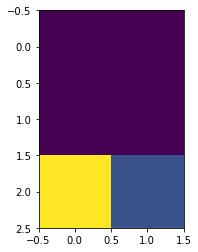

In [69]:
import numpy
import matplotlib.pyplot



a=numpy.zeros([3,2])

a[2,0]=4
a[2,1]=1
matplotlib.pyplot.imshow(a,interpolation='nearest')
print(a)

In [74]:
import numpy
import matplotlib.pyplot
class Dog():
    def bark(self):
        print('ГАУ')
tuzik = Dog()
tuzik.bark()
oleg = Dog()
oleg.bark()
bobik = Dog()
bobik.bark()
sharik = Dog()
sharik.bark()

ГАУ
ГАУ
ГАУ
ГАУ


In [46]:
import numpy
import matplotlib.pyplot
import scipy.special


class neuralNetwork:
    # инициализировать нейронную сеть
    def __init__(self, inputnodes, hidennodes, outputnodes, learningrate):
        # задать кол-во узлов во входном, скрытом и выходном слое
        self.inodes = inputnodes
        self.hnodes = hidennodes
        self.onodes = outputnodes

        # Матрицы весовых коэффициентов связей wih (между входным и скрытым слоями) и who (между скрытым и выходным слоями)
        # Весовые коэффициенты связей между узлом i и узлом j следующего слоя обозначены как w_i_j:
        # w11 w21
        # w12 w22 и т.д.

        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))

        # коэффициент обучения
        self.lr = learningrate
        # Использование сишмоиды в качестве функции активации
        self.activation_function = lambda x: scipy.special.expit(x)

    # Тренировка нейронной сети
    def train(self, inputs_list, targets_list):
        # Преобразовать список входных значений в двумерный массив
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T

        # Рассчитать входящие сигналы для скрытого слоя
        hidden_inputs = numpy.dot(self.wih, inputs)
        # Рассчитать исходящие сигналы для скрытого слоя
        hidden_outputs = self.activation_function(hidden_inputs)

        # Рассчитать входящие сигналы для выходного слоя
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # Рассчитать исходящие сигналы для выходного слоя
        final_outputs = self.activation_function(final_inputs)

        # Ошибки выходного слоя - (целевое значение - фактическое)
        output_errors = targets - final_outputs
        # ошибки скрытого слоя - это ошибки output_errors,
        # распределение пропорционально весовым коэффициентам связей
        # и рекомбинированные на скрытых узлах
        hidden_errors = numpy.dot(self.who.T, output_errors)
        # обновить весовые коэффициенты для связей между скрытым и выходным слоями
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)),
                                        numpy.transpose(hidden_outputs))
        # Обновить весовые коэффициенты для связей между входным и скрытым слоями
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)),
                                        numpy.transpose(inputs))

    # Опрос нейронной сети
    def query(self, inputs_list):
        # Преобразовать список входных значений в двумерный массив
        inputs = numpy.array(inputs_list, ndmin=2).T

        # Рассчитать входящие сигналы для скрытого слоя
        hidden_inputs = numpy.dot(self.wih, inputs)
        # Рассчитать исходящие
        hidden_outputs = self.activation_function(hidden_inputs)

        # Рассчитать входящие сигналы для выходного слоя
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # Рассчитать исходящие сигналы для выходного слоя
        final_outputs = self.activation_function(final_inputs)

        return final_outputs


# кол-во входных, скрытых и выходных узлов
input_nodes = 784
hiden_nodes = 100
output_nodes = 10

# коэф обучения
learning_rate = 0.3

# создать экземпляр нейронной сети
n = neuralNetwork(input_nodes, hiden_nodes, output_nodes, learning_rate)

training_data_file = open("C:/Users/user1/Desktop/Mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# Тренировка нейронной сети

# Перебрать все записи в тренировочном наборе данных
for record in training_data_list[1: 100]:
    # получить список значений, используя символы запятой (',')
    # в качестве разделителей
    all_values = record.split(',')
    # Масштабировать и сместить входные значения
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # создать целевые выходные значения (все равны 0,01, за исключением желаемого маркерного значения, равного 0,99)
    targets = numpy.zeros(output_nodes) + 0.01

    # all_values[0] - целевое маркерное значение для данной записи
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)

ValueError: shapes (100,784) and (99,1) not aligned: 784 (dim 1) != 99 (dim 0)